# **Importando as bibliotecas necessárias**

In [77]:
# libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
np.random.seed(32)


from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Conv1D, MaxPooling1D, Dropout
from keras.utils.np_utils import to_categorical


%matplotlib inline

# **Leitura da Base de Dados**

In [78]:
df = pd.read_csv("Corpus_processado - Copia.csv", encoding='latin-1', sep=';')

In [79]:
df.head()

,number,pmid,abstract,classe
0,1,1896522,antitumorpromot principl angelica keiskei pote...,Positive
1,2,8348114,effect catechin mous lung carcinoma cell adhes...,Positive
2,3,8840961,cyclooxygenas inhibitor potenti properti colon...,Positive
3,4,9654112,phase novel sulfonamid discov slowgrow colon c...,Positive
4,5,11596202,retinoid iv design synthesi structureact ditbu...,Positive


(array([240.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 159.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

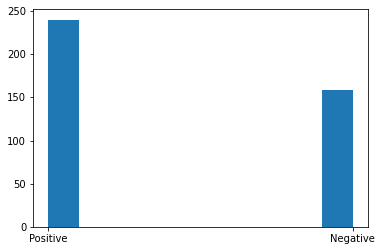

In [80]:
plt.hist(df['classe'])

In [81]:
df['target'] = df['number'] < 4

In [82]:
train_text, test_text, train_y, test_y = train_test_split(df['abstract'],df['target'],test_size = 0.2)

In [83]:
train_text.shape

(319,)

# **Tokenização dos resumos**

In [84]:
MAX_NB_WORDS = 20000

# get the raw text data
texts_train = train_text.astype(str)
texts_test = test_text.astype(str)

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 6017 unique tokens.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/text.py:180: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [85]:
sequences[0]

[120,
 740,
 1938,
 2488,
 1120,
 450,
 1313,
 1313,
 1314,
 1120,
 17,
 74,
 3501,
 218,
 2489,
 219,
 50,
 1315,
 1120,
 219,
 1121,
 192,
 6,
 107,
 1939,
 1316,
 3502,
 3503,
 1317,
 1567,
 1940,
 424,
 2490,
 1567,
 6,
 3504,
 343,
 3505,
 1941,
 3506,
 370,
 39,
 3507,
 3508,
 451,
 424,
 3509,
 1939,
 294,
 452,
 295,
 740,
 1938,
 3510,
 1942,
 242,
 3511,
 1943,
 666,
 1568,
 1120,
 1944,
 1318,
 220,
 402,
 1319,
 318,
 49,
 845,
 1313,
 1320,
 2491,
 1941,
 453,
 3512,
 228,
 2492,
 667,
 846,
 120,
 1569,
 6,
 425,
 595,
 978,
 1122,
 1321,
 200,
 2493,
 979,
 489,
 3513,
 60,
 219,
 596,
 229,
 2494,
 4,
 1941,
 1945,
 75,
 243,
 3514,
 61,
 129,
 1567,
 81,
 1569,
 6,
 3515,
 343,
 144,
 296,
 3516,
 1322,
 1123,
 668,
 2493,
 3517,
 4,
 1124,
 1125,
 2495,
 3518,
 1323,
 3519,
 1123,
 6,
 3520,
 741,
 344,
 371,
 319,
 345,
 1567,
 6,
 1324,
 597,
 1570,
 742,
 6,
 104,
 3521,
 3522,
 1126,
 3523,
 272,
 3524,
 49,
 117,
 6,
 2496,
 145,
 14,
 297,
 3525,
 743,
 598,
 27

In [86]:
type(tokenizer.word_index), len(tokenizer.word_index)

(dict, 6017)

In [87]:
index_to_word = dict((i, w) for w, i in tokenizer.word_index.items())

In [88]:
" ".join([index_to_word[i] for i in sequences[0]])

'case left frontal highgrad glioma diagnos pregnanc pregnanc acceler glioma growth therapeut abort recommend prior resect addit extent glioma resect close correl patient surviv cm yearold righthand primigravida institut gestat obtain second opinion gestat patient newonset general convuls seizur gcss poor control anticonvuls polytherapi earli second trimest cm lesion locat her left frontal supplementari motor area sma suspect grade iii glioma classifi world health organ guidelin limit evid adjuv pregnanc neurolog symptom seizur stabil matern condit enabl safe birth case pregnant patient awak craniotomi intraop magnet reson imag imri advantag achiev gross total resect reduct direct cortic induc seizur fetal exposur anesthet asleepawakeasleep techniqu perform gestat propofol pregnant patient prohibit general anesthesia maintain sevofluran remifentanil until scan imri re induc dexmedetomidin remov accomplish supraglott airway sga until patient cranium open complic procedur postop period ge

In [15]:
seq_lens = [len(s) for s in sequences]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))

average length: 113.8
max length: 274


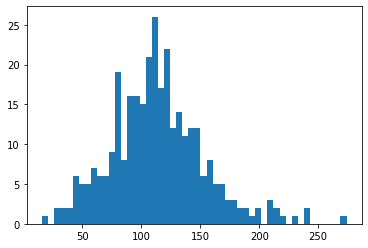

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(seq_lens, bins=50);

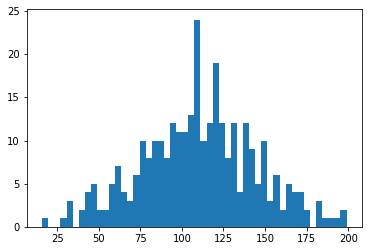

In [90]:
plt.hist([l for l in seq_lens if l < 200], bins=50);

# **Divisão para treinamento e teste**

In [91]:
MAX_SEQUENCE_LENGTH = 150

# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

Shape of data tensor: (319, 150)
Shape of data test tensor: (80, 150)


In [92]:
y_train = train_y
y_test = test_y

y_train = to_categorical(np.asarray(y_train))
print('Shape of label tensor:', y_train.shape)

Shape of label tensor: (319, 2)


# **Montando o modelo da Rede Neural**

In [93]:
from keras.metrics import accuracy
from keras.layers import Dense, Input, Flatten
from keras.layers import GlobalAveragePooling1D, Embedding
from keras.models import Model
import tensorflow as tf

EMBEDDING_DIM = 50
N_CLASSES = 2
# input: a sequence of MAX_SEQUENCE_LENGTH integers
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_layer = Embedding(MAX_NB_WORDS, EMBEDDING_DIM,
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)
embedded_sequences = embedding_layer(sequence_input)
average = GlobalAveragePooling1D()(embedded_sequences)
predictions = Dense(N_CLASSES, activation='softmax')(average)
model = Model(sequence_input, predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [94]:
rnn = model.fit(x_train, y_train, validation_split=0.1,
          epochs=10, batch_size=128)

Epoch 1/10
3/3 [==============================] - 1s 95ms/step - loss: 0.6812 - accuracy: 0.9129 - val_loss: 0.6665 - val_accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 0s 22ms/step - loss: 0.6610 - accuracy: 0.9895 - val_loss: 0.6478 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 0s 22ms/step - loss: 0.6412 - accuracy: 0.9895 - val_loss: 0.6292 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 0s 26ms/step - loss: 0.6220 - accuracy: 0.9895 - val_loss: 0.6107 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 0s 23ms/step - loss: 0.6026 - accuracy: 0.9895 - val_loss: 0.5924 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 0s 25ms/step - loss: 0.5834 - accuracy: 0.9895 - val_loss: 0.5739 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 0s 25ms/step - loss: 0.5640 - accuracy: 0.9895 - val_loss: 0.5553 - val_accuracy: 1.0000
Epoch 8/10
3/3 [===========

# **Predições e Acurácia**

In [95]:
y_true = np.array([0, 0, 0, 0])
y_scores = np.array([1, 0, 0, 0])

In [96]:
y_pred = model.predict(x_test)

In [107]:
y_pred = model.predict(x_test)
print("test auc:", accuracy_score(x_train, y_pred))

ValueError: ignored

In [26]:
# input: a sequence of MAX_SEQUENCE_LENGTH integers
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

x = LSTM(128, dropout=0.2, recurrent_dropout=0.2)(embedded_sequences)
predictions = Dense(2, activation='softmax')(x)


model = Model(sequence_input, predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [28]:
model.fit(x_train, y_train, validation_split=0.1,
          epochs=2, batch_size=128)

Epoch 1/2
3/3 [==============================] - 11s 1s/step - loss: 0.6742 - acc: 0.6899 - val_loss: 0.5965 - val_acc: 1.0000
Epoch 2/2
3/3 [==============================] - 3s 895ms/step - loss: 0.5609 - acc: 0.9895 - val_loss: 0.4296 - val_acc: 1.0000


In [29]:
output_test = model.predict(x_test)
print("test auc:", roc_auc_score(y_test,output_test[:,1]))

ValueError: ignored

In [30]:
# input: a sequence of MAX_SEQUENCE_LENGTH integers
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

# 1D convolution with 64 output channels
x = Conv1D(64, 5)(embedded_sequences)
# MaxPool divides the length of the sequence by 5
x = MaxPooling1D(5)(x)
x = Dropout(0.2)(x)
x = Conv1D(64, 5)(x)
x = MaxPooling1D(5)(x)
# LSTM layer with a hidden size of 64
x = Dropout(0.2)(x)
x = LSTM(64)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(sequence_input, predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [31]:
model.fit(x_train, y_train, validation_split=0.1,
          epochs=5, batch_size=128)

Epoch 1/5
3/3 [==============================] - 6s 552ms/step - loss: 0.6616 - acc: 0.5679 - val_loss: 0.5041 - val_acc: 1.0000
Epoch 2/5
3/3 [==============================] - 0s 131ms/step - loss: 0.4441 - acc: 0.9895 - val_loss: 0.2615 - val_acc: 1.0000
Epoch 3/5
3/3 [==============================] - 0s 141ms/step - loss: 0.2023 - acc: 0.9895 - val_loss: 0.0668 - val_acc: 1.0000
Epoch 4/5
3/3 [==============================] - 0s 126ms/step - loss: 0.0704 - acc: 0.9895 - val_loss: 0.0106 - val_acc: 1.0000
Epoch 5/5
3/3 [==============================] - 0s 128ms/step - loss: 0.0547 - acc: 0.9895 - val_loss: 0.0025 - val_acc: 1.0000


In [32]:
output_test = model.predict(x_test)
print("test auc:", roc_auc_score(y_test,output_test[:,1]))

ValueError: ignored

In [34]:
from keras import backend as K
get_emb_layer_output = K.function([model.layers[0].input],
                                  [model.layers[2].input])
embedding_output = get_emb_layer_output([x_test[:3000]])[0]

In [35]:
emb_shape = embedding_output.shape
to_plot_embedding = embedding_output.reshape(emb_shape[0],emb_shape[1]*emb_shape[2])
y = y_test[:3000]

In [36]:
sentence_emb_tsne = TSNE(perplexity=30).fit_transform(to_plot_embedding)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [37]:
print(sentence_emb_tsne.shape)
print(y.shape)

(80, 2)
(80,)


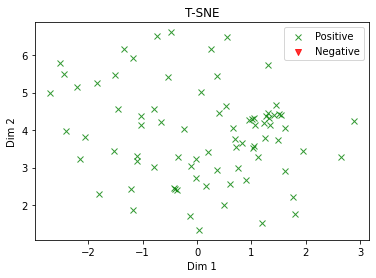

In [108]:
plt.figure()
plt.scatter(sentence_emb_tsne[np.where(y == 0), 0],
                   sentence_emb_tsne[np.where(y == 0), 1],
                   marker='x', color='g',
                   linewidth='1', alpha=0.8, label='Positive')
plt.scatter(sentence_emb_tsne[np.where(y == 1), 0],
                   sentence_emb_tsne[np.where(y == 1), 1],
                   marker='v', color='r',
                   linewidth='1', alpha=0.8, label='Negative')

plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.title('T-SNE')
plt.legend(loc='best')
plt.savefig('1.png')
plt.show()  